In [14]:
import ads
ads.hello()



  O  o-o   o-o
 / \ |  \ |
o---o|   O o-o
|   ||  /     |
o   oo-o  o--o

ADS SDK version: 2.6.3
Pandas version: 1.3.5
Debug mode: False



In [3]:
import oci
print(oci.__version__);

2.80.1


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["species"] = data.target

from ads.dataset.factory import DatasetFactory

# these two are equivalent:
ds = DatasetFactory.open(df, target="species")
# OR
ds = DatasetFactory.from_dataframe(df, target="species")

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
ds.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


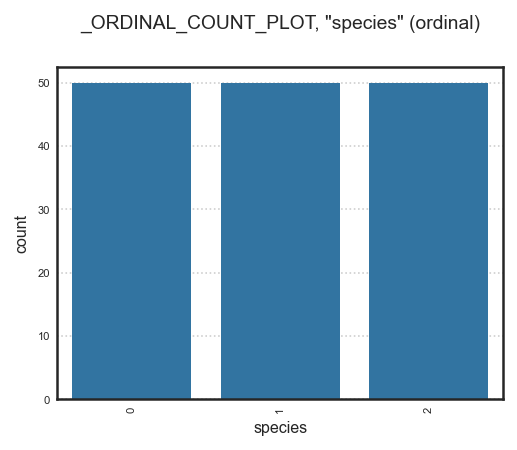

In [6]:
ds.target.show_in_notebook()

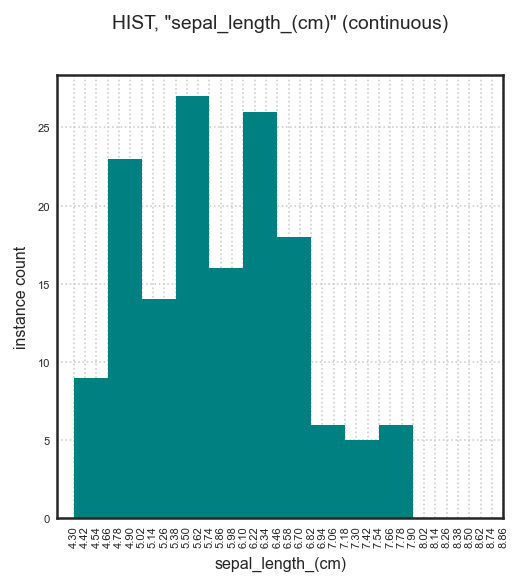

In [8]:
ds.plot("sepal_length_(cm)").show_in_notebook(figsize=(4,4))

In [12]:

from ads.common.auth import default_signer


ads.set_auth(auth="api_key", oci_config_location=oci.config.DEFAULT_LOCATION, profile="specialist2-4sdk")
bucket_name = "bucket-20220501-1555"
file_name = "iris.csv"
namespace = "ocichina001"
df = pd.read_csv(f"oci://{bucket_name}@{namespace}/{file_name}", storage_options=default_signer())
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
from ads.common.auth import default_signer

ads.set_auth(auth="api_key", oci_config_location=oci.config.DEFAULT_LOCATION, profile="specialist2-4sdk")
bucket_name = "bucket-20220501-1555"
file_name = "iris.csv"
namespace = "ocichina001"
storage_options = {'config':"~/.oci/config", 'profile': "specialist2-4sdk", 'tenancy': 'ocid1.tenancy.oc1..aaaaaaaavnk4luuiasjkuhiizwnwust2xx3td7b4cbj5vhiccb47hra26p4q', 'region': "ap-singapore-1"}
ds = DatasetFactory.open(f"oci://{bucket_name}@{namespace}/{file_name}", storage_options=storage_options)
ds.head()

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
from ocifs import OCIFileSystem

fs = OCIFileSystem(config="~/.oci/config", profile="specialist2-4sdk")

from dask import dataframe as dd
bucket_name = "bucket-20220501-1555"
file_name = "iris.csv"
namespace = "ocichina001"
storage_options = {'config':"~/.oci/config", 'profile': "specialist2-4sdk", 'tenancy': 'ocid1.tenancy.oc1..aaaaaaaavnk4luuiasjkuhiizwnwust2xx3td7b4cbj5vhiccb47hra26p4q', 'region': "ap-singapore-1"}
ds = dd.read_csv(f"oci://{bucket_name}@{namespace}/{file_name}",
            storage_options=storage_options)
ds.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
